In [24]:
!pip install pennylane

/bin/bash: line 1: pip: command not found


In [1]:
import pennylane as qml

# Quantum Galton Board When n=1


[0.  0.5 0.5 0. ]


(<Figure size 700x500 with 1 Axes>, <Axes: >)

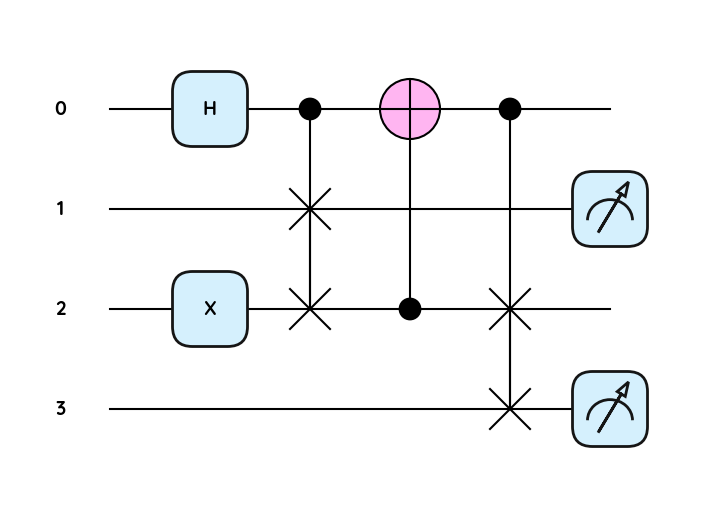

In [3]:
from utils import qalton

qc = qalton.build_galton_circuit(levels=2)
print(qc())
qml.draw_mpl(qc, style="pennylane")()

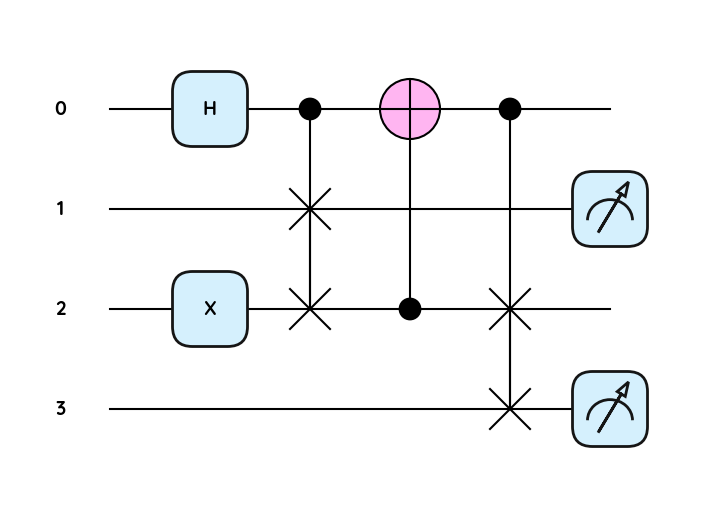

In [4]:
dev = qml.device("default.qubit", wires=4, shots=10000)

@qml.qnode(dev)
def n1circuit():
  # 1. H gate on q0, and x gate on q2
  # 2. controlled SWAP gate w/ control as q0, and targets as q1 & q2
  # 3. cnot gate w/ control as q2 and target as q0
  # 4. controlled SWAP gate w/ control as q0, and targets as q2 & q3
  # 5. find probabilities of q1 & q3

  qml.Hadamard(wires=[0])
  qml.PauliX(wires=[2])
  qml.CSWAP(wires=[0,1,2])
  qml.CNOT(wires=[2,0])
  qml.CSWAP(wires=[0,2,3])
  return qml.probs(wires=[1,3])

qml.draw_mpl(n1circuit,style='pennylane')(); #draws circuit

# Simulation for 1-Peg Galton Board

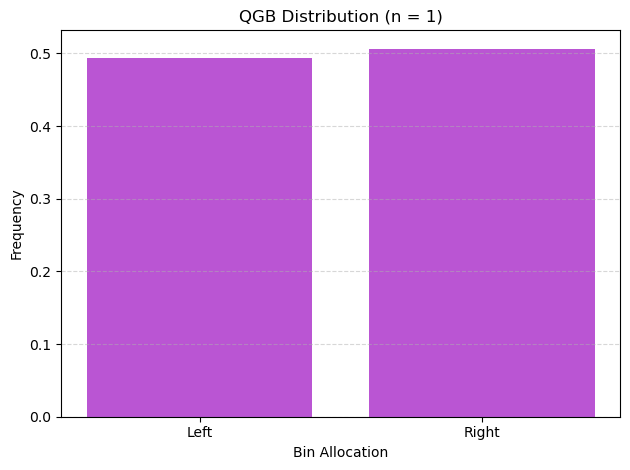

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# so we should have two qubits -> possibilities are |00>, |01>, |10>, and |11>;
# If it's bounces to the left then it's 0. If it bounces to the right then it's 1.
# We need to count the number of 1s to figure out how far to the right it went.
# E.g. n=3 galton board -> 4 bins.
# 0 1 2 3 <- Bin # from left to right. Let's check all possibilities.
# |000> -> left, left, left -> count = 0 -> Bin 0 (leftmost bin)
# |001> -> left, left, right -> count = 1 -> Bin 1
# |010> -> left, right, left -> count = 1 -> Bin 1
# |011> -> left, right, right -> count = 2 -> Bin 2
# |100> -> right, left, left -> count = 1 -> Bin 1
# |101> -> left, left, left -> count = 2 -> Bin 2
# |110> -> right, right, left -> count = 2 -> Bin 2
# |111> -> right, right, right -> count = 3 -> Bin 3

prob1 = np.array(n1circuit()) #move probabilities of circuit to here

# I have no idea which one goes right and which one goes left
prob_left = prob1[2]
prob_right = prob1[1]

#Plotting time!
plt.bar([0, 1], [prob_left, prob_right], color='mediumorchid')
plt.xticks([0, 1], ['Left', 'Right'])
plt.xlabel("Bin Allocation")
plt.ylabel("Frequency")
plt.title("QGB Distribution (n = 1)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Quantum Galton Board When n=2

tensor([0.    , 0.2489, 0.5027, 0.    , 0.2484, 0.    , 0.    , 0.    ], requires_grad=True)

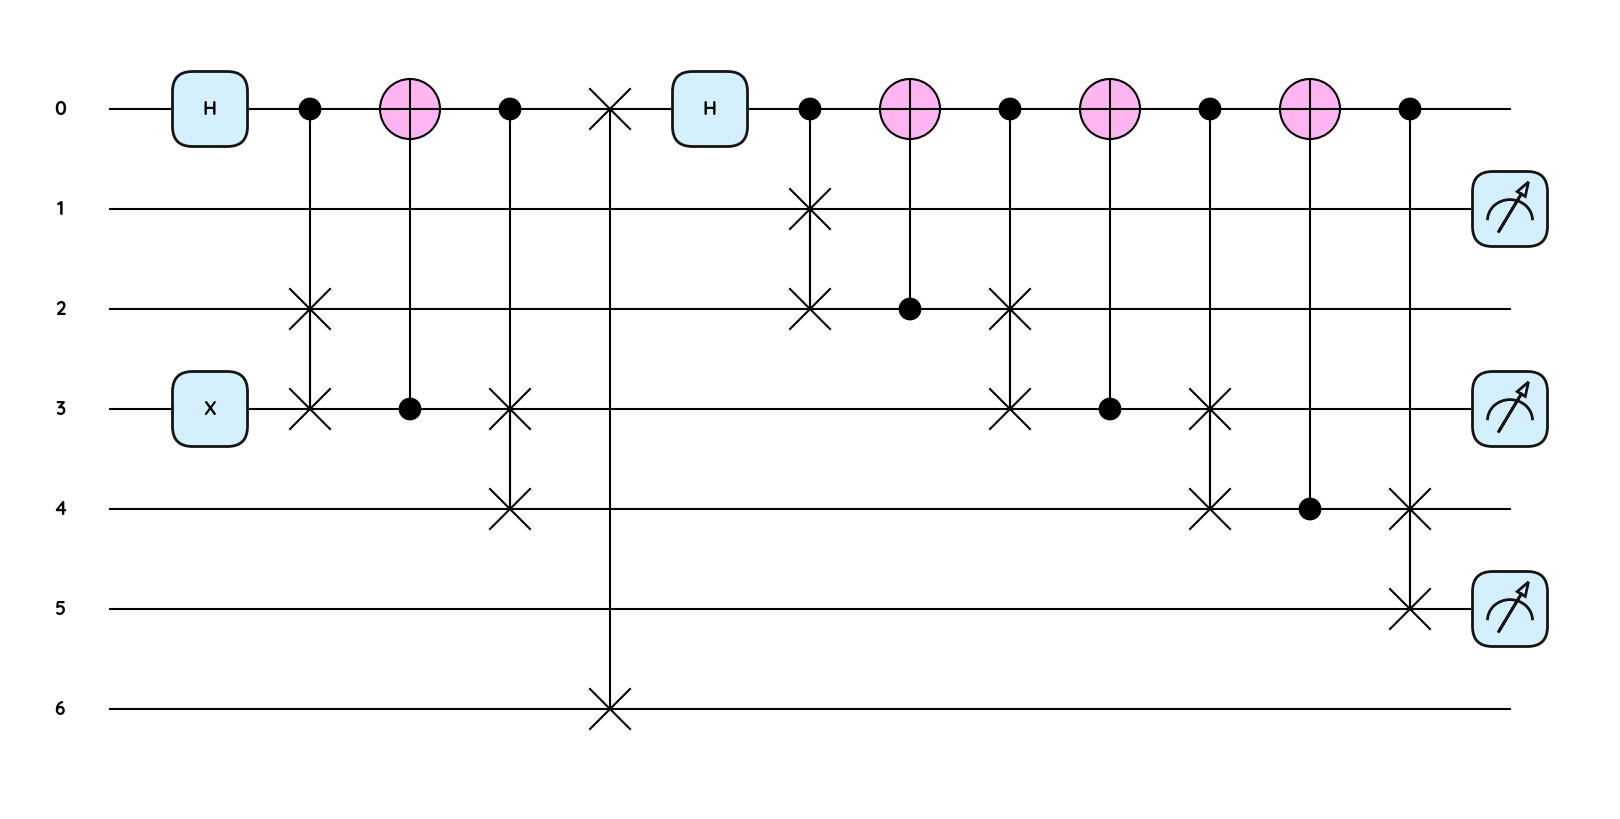

In [36]:
dev2 = qml.device("default.qubit", wires=7, shots=10000)

@qml.qnode(dev2)
def n2circuit():
  # 1. H gate on q0, and x gate on q3
  # 2. controlled SWAP gate w/ control as q0, and targets as q2 & q3
  # 3. cnot gate w/ control as q3 and target as q0
  # 4. controlled SWAP gate w/ control as q0, and targets as q3 & q4
  # 5. reset q0 as |0>
  # ----- so at this part I don't understand why they do this
  # 6. H gate on q0
  # 7. CSWAP w/ control as q0, and targets as q1 & q2
  # 8. CNOT w/ control as q2 and target as q0
  # ------
  # 9. CSWAP w/ control as q0, and targets as q2 & q3
  # 10. CNOT w/ control as q3 and target as q0
    # ------
  # 9. CSWAP w/ control as q0, and targets as q3 & q4
  # 10. CNOT w/ control as q4 and target as q0
    # ------
  # 9. CSWAP w/ control as q0, and targets as q4 & q5
  #10. Measure q1, q3, and q5

  qml.Hadamard(wires=[0])
  qml.PauliX(wires=[3])
  qml.CSWAP(wires=[0,2,3])
  qml.CNOT(wires=[3,0])
  qml.CSWAP(wires=[0,3,4])
  qml.SWAP(wires=[0, 6]) #swap it with an unused qubit on wire 6 to reset it to |0>

  # Reset control wire
  # m = qml.measure(wires=[0])
  # qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT

  qml.Hadamard(wires=[0])
  qml.CSWAP(wires=[0, 1, 2])
  qml.CNOT(wires=[2, 0])
  qml.CSWAP(wires=[0, 2, 3])
  qml.CNOT(wires=[3, 0])
  qml.CSWAP(wires=[0, 3, 4])
  qml.CNOT(wires=[4, 0])
  qml.CSWAP(wires=[0, 4, 5])

  return qml.probs(wires=[1,3,5])

qml.draw_mpl(n2circuit,style='pennylane')(); #draws circuit
n2circuit() #probability for 1 peg

# Simulation for 3-Peg Galton Board



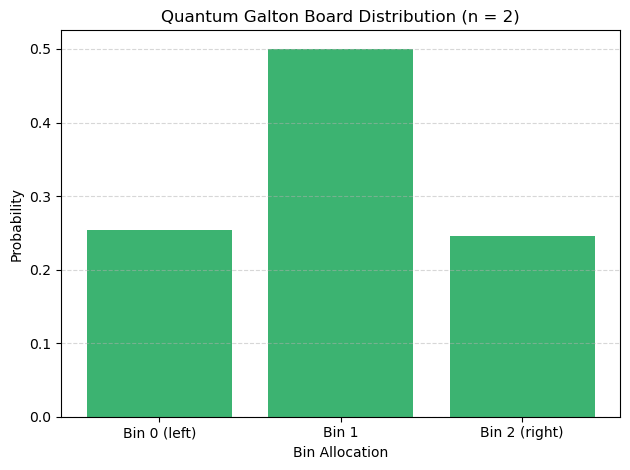

In [37]:
# Run simulation
probs2 = n2circuit()

# Extract probabilities
prob_bin0 = probs2[4]
prob_bin1 = probs2[2]
prob_bin2 = probs2[1]

# Plot
plt.bar([0, 1, 2], [prob_bin0, prob_bin1, prob_bin2], color='mediumseagreen')
plt.xticks([0, 1, 2], ['Bin 0 (left)', 'Bin 1', 'Bin 2 (right)'])
plt.xlabel("Bin Allocation")
plt.ylabel("Probability")
plt.title("Quantum Galton Board Distribution (n = 2)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()